In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f1(x):
    return 3*x**2 - 4 * x - 5

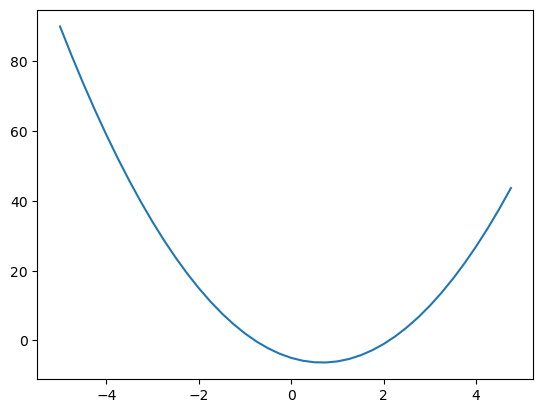

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f1(xs)
plt.plot(xs, ys)

In [4]:
h = 0.0000001
x = 4


(f1(x + h) - f1(x)) / h

20.000000375830496

In [5]:
a = 2.0
b = -3.0
c = 10
d = (a * b) + c
print(d)

4.0


In [6]:
h = 0.000001

a = 2.0
b = -3.0
c = 10


d1 = (a * b) + c

d2 = ((a + h) * b) + c

d3 = (a * (b + h)) + c

d4 = (a * b) + (c + h)

print('d1', d1)
print('dd/da', (d2 - d1) / h)
print('dd/db', (d3 - d1) / h)
print('dd/dc', (d4 - d1) / h)

d1 4.0
dd/da -3.000000000419334
dd/db 2.000000000279556
dd/dc 0.9999999992515995


In [33]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')



a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = (a * b) + c
print(d._prev, d._op)

{Value(data=-6.0), Value(data=10.0)} +


In [39]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ | data %.4f }" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [40]:
draw_dot(d)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH